In [4]:
########## Packages ########## 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from IPython.display import HTML
from scipy.integrate import solve_ivp 
from math import pi

In [22]:
########## class ##########
class ODE():
    def __init__(self, alpha, beta, gamma, delta, omega, maxtime):
        self.alpha = alpha 
        self.beta = beta 
        self.gamma = gamma 
        self.delta = delta 
        self.omega = omega 
        self.maxtime = maxtime
    
    ########## dynamics ##########
    def duffing_dynamics(self, t, z):
        x = z 
        dynamics_array = np.empty(2)
        dynamics_array[0] = x[1]
        dynamics_array[1] = (-1)*self.alpha*x[0] - self.beta*x[0]**3 - self.delta*x[1] + self.gamma*np.cos(self.omega*t)
        return dynamics_array
    
    ########## solve ODE by scipy solver ##########
    def rk_solver(self, x_init):
        sol = solve_ivp(fun=self.duffing_dynamics, t_span=[0, self.maxtime], y0=x_init, method='DOP853', dense_output=True, rtol=1e-6, atol=1e-10)
        t = np.linspace(0, self.maxtime, self.maxtime+1)
        z = sol.sol(t)
        return z 

In [21]:
########## Parameters ##########
alpha = -1.0
beta = 1.0
gamma = 1.0 
delta = 0.2
omega = 2*pi*0.2
maxtime = 10
################################

########## instance ##########
ode = ODE(alpha=alpha, beta=beta, gamma=gamma, delta=delta, omega=omega, maxtime=maxtime*10+1)
##############################

In [18]:
########## init value ##########
x_init = np.array([0.0, 0.05])
################################
########## execute Runge-Kutta ##########
sol_z = ode.rk_solver(x_init=x_init)
#########################################

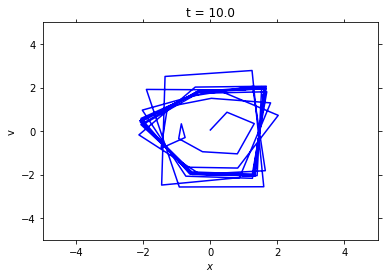

In [24]:
########## plot ##########
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
dt = maxtime/(len(sol_z[0]) - 1)

def update_func(frame):
    ax.clear()
    ax.set_xlabel(r"$x$"); ax.set_ylabel(r"v")
    ax.set_title("t = {}".format(frame*dt))
    ax.set_xlim([-5, 5]); ax.set_ylim([-5, 5])
    ax.plot(sol_z[0][:frame], sol_z[1][:frame], c='b')

ani = animation.FuncAnimation(fig, update_func, frames=range(len(sol_z[0])), interval=200)
ani.save("./3.3_duffing.gif", writer="imagemagick")
HTML(ani.to_jshtml())